In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt 
import statistics as st

## I. Data Importing

In [2]:
## When first importing the data, some columns have mixed data type. 
## The data type will be converted that after importing.

df = pd.read_csv("Documents/cars_listings.csv", header=0)

/Users/mike/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


## II. Data Cleaning

#### 1. Drop 02 columns: color_slug & stk_year. 
#### Explanation: 94% data points in color_slug and 48% data points in stk_year are Null value, which is meaningless for the analysis

In [4]:
df.drop(['color_slug', 'stk_year'], axis = 1, inplace = True)

In [5]:
## Check
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'date_created', 'date_last_seen', 'price_eur'],
      dtype='object')

#### 2. Remove null value

In [6]:
## Convert all empty string value to null value
df.replace('', np.nan, inplace = True)

## Remove null value
df_clean = df.dropna()

In [7]:
## Check if there is still null values
df_clean.isnull().values.any()

False

#### 3. Convert data type

In [8]:
df_clean = df_clean.astype({'manufacture_year':int, 'engine_displacement':int, 'engine_power':int})
df_clean['date_created'] = pd.to_datetime(df_clean['date_created']).dt.date
df_clean['date_last_seen'] = pd.to_datetime(df_clean['date_last_seen']).dt.date

In [9]:
df_clean['door_count'] = pd.to_numeric(df_clean['door_count'],errors='coerce')
df_clean['seat_count'] = pd.to_numeric(df_clean['seat_count'],errors='coerce')

In [10]:
## drop null to remove null value resulted from junk text mixed in door_count & seat_count columns which resulted in null value
df_clean = df_clean.dropna()

In [11]:
pd.options.display.float_format = '{:,.0f}'.format

In [12]:
df_clean

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
507,mercedes-benz,viano,"203,593",2011,2143,120,van,man,5,5,diesel,2015-11-14,2016-01-27,"22,169"
898,ford,s-max,"137,316",2011,2000,103,van,man,5,5,diesel,2015-11-14,2016-01-27,"9,437"
1007,hyundai,matrix,"182,000",2002,1795,90,van,man,5,5,gasoline,2015-11-14,2016-01-27,"1,073"
1079,chrysler,town-country,"122,800",2012,3604,214,van,auto,5,7,gasoline,2015-11-14,2016-01-27,"18,468"
1603,fiat,doblo,"155,623",2006,1910,77,van,man,4,5,diesel,2015-11-14,2016-01-27,"3,516"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550257,audi,a4,"153,000",2001,1984,96,sedan,man,4,5,gasoline,2017-03-16,2017-03-16,"1,295"
3550258,citroen,c3,"151,433",2008,1360,54,coupe,man,5,5,gasoline,2017-03-16,2017-03-16,"1,295"
3550261,fiat,stilo,"210,000",2002,1910,85,coupe,man,5,5,diesel,2017-03-16,2017-03-16,"1,295"
3550264,volkswagen,passat,"183,589",2006,1968,103,stationwagon,auto,5,5,diesel,2017-03-16,2017-03-16,"1,295"


#### 4. Remove out-of-range data

In [13]:
## Check out-out-range value
df_clean.describe()

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur
count,"109,936","109,936","109,936","109,936","109,936","109,936","109,936"
mean,"128,021","2,009","1,767",91,5,5,"2,792"
std,"90,044",5,617,41,1,1,"10,730"
min,0,"1,955",10,10,1,1,500
25%,"58,622","2,005","1,396",66,5,5,"1,295"
50%,"131,000","2,009","1,600",81,5,5,"1,295"
75%,"184,000","2,013","1,986",103,5,5,"1,295"
max,"5,115,142","2,017","32,767",999,6,17,"1,050,000"


(array([5.86851705e-06, 1.76055511e-05, 5.28166534e-05, 1.17370341e-05,
        4.98823949e-05, 2.46477716e-04, 3.92016939e-03, 3.09710987e-02,
        6.21373256e-02, 6.38773410e-02]),
 array([1955. , 1961.2, 1967.4, 1973.6, 1979.8, 1986. , 1992.2, 1998.4,
        2004.6, 2010.8, 2017. ]),
 <BarContainer object of 10 artists>)

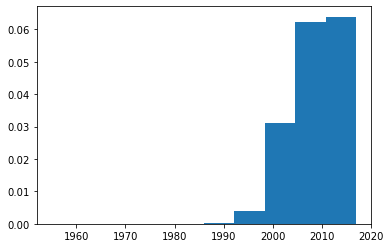

In [14]:
## Plot a histogram of manufacturer_year to check the distribution

plt.hist(df_clean['manufacture_year'], density = True)

(array([0.00050112, 0.00240748, 0.00673534, 0.02662598, 0.02928577,
        0.06622853, 0.0776702 , 0.04782023, 0.06425909, 0.06308163]),
 array([1991. , 1993.6, 1996.2, 1998.8, 2001.4, 2004. , 2006.6, 2009.2,
        2011.8, 2014.4, 2017. ]),
 <BarContainer object of 10 artists>)

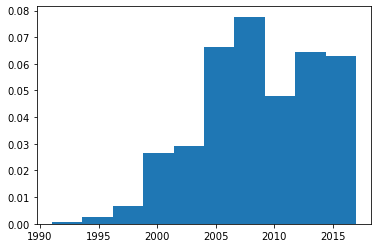

In [15]:
## There is not much of the data points with values < 1990
## Remove manufacture_year < 1990

df_clean = df_clean[df_clean.manufacture_year > 1990]
plt.hist(df_clean['manufacture_year'], density = True)

In [16]:
## Remove mileage = 0 since the company is focused on Used-Cars
df_clean = df_clean[df_clean.mileage != 0]

(array([5.64058483e-04, 9.54075203e-04, 1.07648909e-04, 8.04311425e-05,
        1.23702106e-05, 8.24130187e-06, 4.31058074e-06, 1.53595406e-06,
        2.21309509e-06, 9.24875561e-07]),
 array([1000. , 1576.1, 2152.2, 2728.3, 3304.4, 3880.5, 4456.6, 5032.7,
        5608.8, 6184.9, 6761. ]),
 <BarContainer object of 10 artists>)

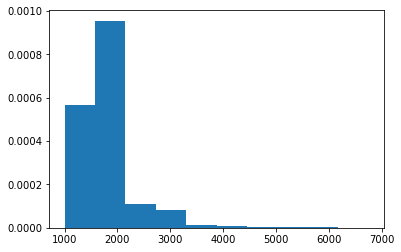

In [17]:
## Range engine_displacement

df_clean = df_clean[(df_clean.engine_displacement >= 1000)& (df_clean.engine_displacement <= 7000)] 
plt.hist(df_clean['engine_displacement'], density = True)

## III. Data Analysis

#### 1. Add column "time_to_sold"

In [18]:
df_clean['time_to_sold'] = (df_clean['date_last_seen'] - df_clean['date_created']).dt.days

In [19]:
df_clean.describe()

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur,time_to_sold
count,"105,101","105,101","105,101","105,101","105,101","105,101","105,101","105,101"
mean,"131,846","2,008","1,791",92,5,5,"2,703",29
std,"89,412",5,548,41,1,1,"10,338",34
min,1,"1,991","1,000",10,1,1,500,0
25%,"65,961","2,005","1,400",66,5,5,"1,295",7
50%,"135,089","2,009","1,685",81,5,5,"1,295",16
75%,"186,452","2,012","1,995",103,5,5,"1,295",41
max,"5,115,142","2,017","6,761",997,6,17,"1,050,000",179


#### 2. Top 10 Best-Selling Cars

In [20]:
best_selling_cars = df_clean.groupby(['maker', 'model'])['maker'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(10)

In [21]:
best_selling_cars

,maker,model,count
683,skoda,octavia,12052
678,skoda,fabia,8401
762,volkswagen,passat,3419
755,volkswagen,golf,2991
264,ford,focus,2738
686,skoda,superb,2588
271,ford,mondeo,1903
684,skoda,rapid,1572
577,opel,astra,1402
642,renault,megane,1361


#### 3. Top 10 Fastest-Selling Cars

In [22]:
fastest_selling_cars = df_clean.groupby(['maker', 'model']).agg({'time_to_sold' : 'mean'}).sort_values(by = 'time_to_sold', ascending = True).rename(columns = {'time_to_sold' : 'avg_time_to_sold'}).head(10)

In [23]:
fastest_selling_cars.reset_index()

,maker,model,avg_time_to_sold
0,bmw,420i,0
1,mercedes-benz,gle350-cdi,0
2,mercedes-benz,ml230,0
3,mercedes-benz,r350-cdi,0
4,toyota,mr2,0
5,mercedes-benz,e500,0
6,lexus,sc,0
7,mercedes-benz,cls350-cdi,0
8,bmw,850csi,0
9,bmw,760i,0


#### 4. Join to get car's attributes

In [24]:
best_selling_cars_information = pd.merge(
    best_selling_cars.reset_index(),
    df_clean.reset_index(),
    on = ['maker', 'model']
)

In [25]:
best_selling_cars_information

,index_x,maker,model,count,index_y,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,time_to_sold
0,683,skoda,octavia,12052,1173383,"183,831",2006,1595,75,compact,man,5,5,gasoline,2016-01-11,2016-01-19,"4,950",8
1,683,skoda,octavia,12052,1186064,"218,268",2005,1896,81,other,man,5,5,diesel,2016-01-11,2016-01-19,"3,800",8
2,683,skoda,octavia,12052,1195186,"146,600",2010,1896,77,other,man,3,2,diesel,2016-01-12,2016-01-20,"6,990",8
3,683,skoda,octavia,12052,1341809,"86,398",2003,1984,85,compact,auto,5,5,gasoline,2016-01-22,2016-01-25,"3,950",3
4,683,skoda,octavia,12052,1344183,"177,000",2011,1598,77,compact,man,5,5,diesel,2016-01-22,2016-01-25,"9,490",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,642,renault,megane,1361,3550105,"269,000",2007,1598,82,convertible,auto,2,4,lpg,2017-03-16,2017-03-16,"1,295",0
38423,642,renault,megane,1361,3550131,"182,000",1997,1598,55,sedan,man,4,5,gasoline,2017-03-16,2017-03-16,"1,295",0
38424,642,renault,megane,1361,3550166,1,2017,1461,66,stationwagon,man,5,5,diesel,2017-03-16,2017-03-16,"1,295",0
38425,642,renault,megane,1361,3550173,"175,000",2005,1461,74,sedan,man,4,5,diesel,2017-03-16,2017-03-16,"1,295",0


In [26]:
fastest_selling_cars_information = pd.merge(
    fastest_selling_cars.reset_index(),
    df_clean.reset_index(),
    on = ['maker', 'model']
)

In [27]:
fastest_selling_cars_information

,maker,model,avg_time_to_sold,index,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,time_to_sold
0,bmw,420i,0,3550003,"70,446",2014,1997,135,coupe,auto,3,4,gasoline,2017-03-16,2017-03-16,"1,295",0
1,mercedes-benz,gle350-cdi,0,3510533,"20,200",2016,2987,190,offroad,auto,5,5,diesel,2017-03-08,2017-03-08,"1,295",0
2,mercedes-benz,ml230,0,3523054,"245,560",1998,2245,110,offroad,man,5,7,lpg,2017-03-10,2017-03-10,"1,295",0
3,mercedes-benz,ml230,0,3527476,"245,560",1998,2245,110,offroad,man,5,7,gasoline,2017-03-11,2017-03-11,"1,295",0
4,mercedes-benz,r350-cdi,0,3509017,"79,000",2012,2987,195,stationwagon,auto,5,6,diesel,2017-03-08,2017-03-08,"1,295",0
5,mercedes-benz,r350-cdi,0,3527482,"79,000",2012,2987,195,offroad,auto,5,6,diesel,2017-03-11,2017-03-11,"1,295",0
6,mercedes-benz,r350-cdi,0,3545033,"43,000",2011,2987,195,offroad,auto,5,5,diesel,2017-03-15,2017-03-15,"1,295",0
7,toyota,mr2,0,3530707,"70,000",2000,1794,103,convertible,man,2,2,gasoline,2017-03-12,2017-03-12,"1,295",0
8,mercedes-benz,e500,0,3530085,"139,887",2003,5000,225,sedan,auto,4,5,gasoline,2017-03-12,2017-03-12,"1,295",0
9,lexus,sc,0,3510973,"175,500",2002,4293,210,convertible,auto,5,4,gasoline,2017-03-08,2017-03-08,"1,295",0


## IV. Visualization

#### 1. Best-Selling Cars

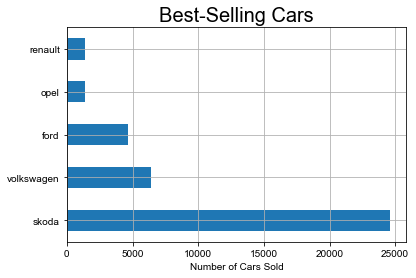

In [28]:
## Horizontal Bar Chart: Best selling cars

best_selling_cars_information['maker'].value_counts().plot.barh()
plt.title('Best-Selling Cars', fontsize = 20)
plt.xlabel('Number of Cars Sold')
plt.grid(True)
plt.rc('grid', linestyle= "dashed", color='gray')
plt.tight_layout()
sns.set_style("whitegrid")
plt.rcParams['axes.axisbelow'] = True
plt.savefig('Best-Selling Cars.png', dpi = 300)

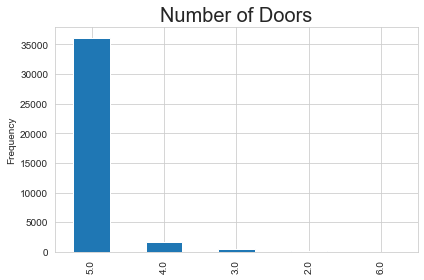

In [29]:
## Bar Chart Frequency Door Count

best_selling_cars_information['door_count'].value_counts().plot.bar()
plt.title('Number of Doors', fontsize = 20)
plt.ylabel('Frequency')
plt.tight_layout()
pd.options.display.float_format = '{:,.0f}'.format
plt.savefig('Number of Doors.png', dpi = 300)
sns.set_style("whitegrid")

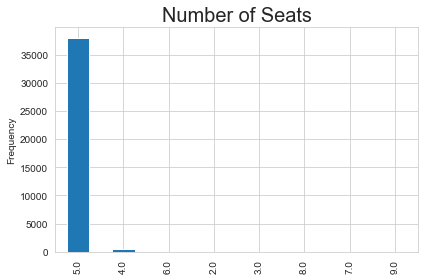

In [30]:
## Bar Chart Frequency Seat Count

best_selling_cars_information['seat_count'].value_counts().plot.bar()
plt.title('Number of Seats', fontsize = 20)
plt.ylabel('Frequency')
plt.tight_layout()
pd.options.display.float_format = '{:,.0f}'.format
plt.savefig('Number of Seats.png', dpi = 300)
sns.set_style("whitegrid")

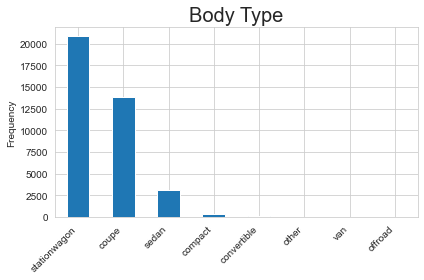

In [31]:
## Bar Chart Frequency Body Type

best_selling_cars_information['body_type'].value_counts().plot.bar()
plt.title('Body Type', fontsize = 20)
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
pd.options.display.float_format = '{:,.0f}'.format
plt.savefig('Body Type.png', dpi = 300)
sns.set_style("whitegrid")

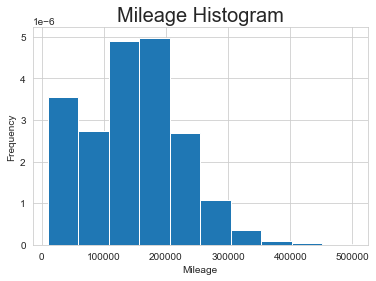

In [32]:
## Mileage Histogram

plt.hist(best_selling_cars_information['mileage'], range = [10000, 500000], density = True)
plt.grid(True)
plt.title('Mileage Histogram', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('Mileage')
plt.savefig('Mileage Histogram.png', dpi = 300)

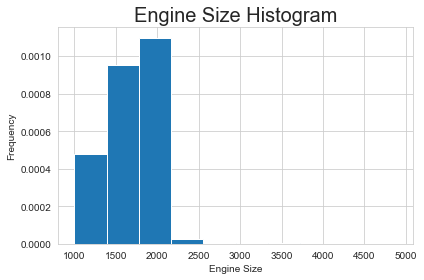

In [33]:
## Engine Size Histogram

plt.hist(best_selling_cars_information['engine_displacement'], density = True)
plt.grid(True)
plt.title('Engine Size Histogram', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('Engine Size')
plt.tight_layout()
plt.savefig('Engine Size Histogram.png', dpi = 300)

In [34]:
## HeatMap for Relationship

d = best_selling_cars_information[['price_eur', 'manufacture_year', 'door_count', 'seat_count','engine_displacement', 'time_to_sold']]

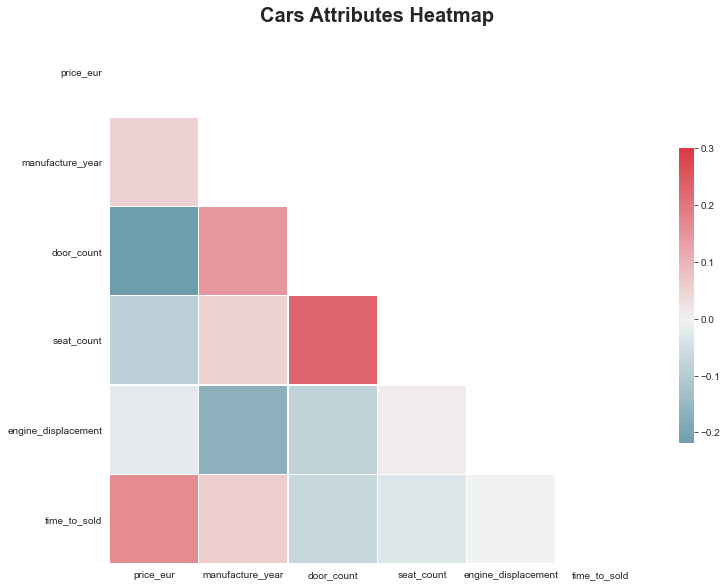

In [35]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save Plot
plt.title('Cars Attributes Heatmap', fontsize = 20, fontweight="bold")
plt.tight_layout()
plt.savefig('Attributes Heatmap.png', dpi = 300)

#### 2. Fastest-Selling Cars

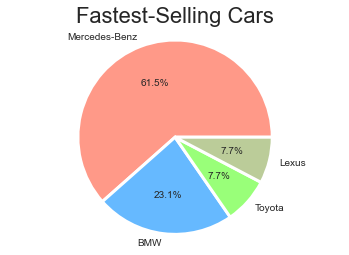

In [36]:
## Pie Chart for Maker

labels = 'Mercedes-Benz','BMW', 'Toyota', 'Lexus'
colors = ['#ff9988','#66b9ff','#99ff79','#bbcc99']
plt.pie(fastest_selling_cars_information['maker'].value_counts(),labels = labels,autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'medium'}, colors = colors)
plt.title('Fastest-Selling Cars', fontsize = 22)
plt.axis('equal')
plt.savefig('Fastest-Selling Cars.png', dpi = 300)

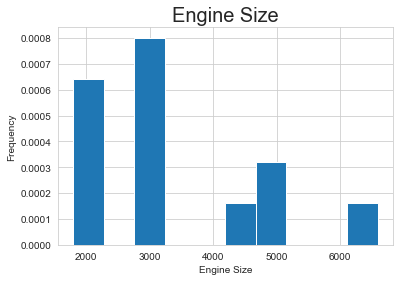

In [37]:
## Engine_Displacement Histogram

plt.hist(fastest_selling_cars_information['engine_displacement'], density = True)
plt.grid(True)
plt.title('Engine Size', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('Engine Size')
plt.savefig('Engine Size.png', dpi = 300)

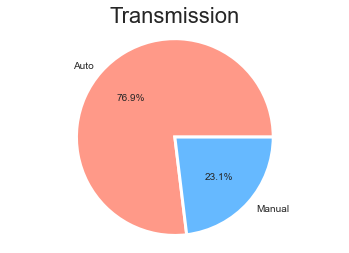

In [38]:
## Pie Chart for Transmission

labels = 'Auto','Manual'
colors = ['#ff9988','#66b9ff','#99ff79','#bbcc99']
plt.pie(fastest_selling_cars_information['transmission'].value_counts(),labels = labels,autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'medium'}, colors = colors)
plt.title('Transmission', fontsize = 22)
plt.axis('equal')
plt.savefig('Transmission.png', dpi = 300)

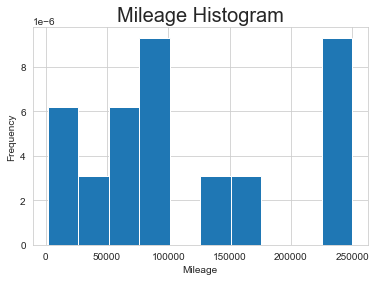

In [39]:
## Mileage Histogram

plt.hist(fastest_selling_cars_information['mileage'], density = True)
plt.grid(True)
plt.title('Mileage Histogram', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('Mileage')
plt.savefig('Fastest-selling cars Mileage.png', dpi = 300)